In [2]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

# importing datasets
df_app_events = pd.read_csv("./src/df_app_event.csv")
df_cost = pd.read_csv("./src/df_cost.csv")
df_installs = pd.read_csv("./src/df_installs.csv")
df_proceeds = pd.read_csv("./src/df_proceeds.csv")

In [3]:
df_app_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10614 entries, 0 to 10613
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10614 non-null  int64  
 1   Unnamed: 0.1    10614 non-null  int64  
 2   Date Time       10614 non-null  object 
 3   Event Name      10614 non-null  object 
 4   Region          5589 non-null   object 
 5   Language        0 non-null      float64
 6   Platform        10614 non-null  object 
 7   Device Type     0 non-null      float64
 8   OS Version      10614 non-null  object 
 9   Is Retargeting  10614 non-null  bool   
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 756.8+ KB


In [4]:
df_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3466 entries, 0 to 3465
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    3466 non-null   int64  
 1   media_source  3466 non-null   object 
 2   date          3466 non-null   object 
 3   geo           3452 non-null   object 
 4   cost          3466 non-null   float64
 5   currency      3466 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 162.6+ KB


In [5]:
df_installs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107175 entries, 0 to 107174
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      107175 non-null  int64 
 1   Unnamed: 0.1    107175 non-null  int64 
 2   Date Time       107175 non-null  object
 3   Event Name      107175 non-null  object
 4   Region          71945 non-null   object
 5   Language        107129 non-null  object
 6   Platform        107175 non-null  object
 7   Device Type     107175 non-null  object
 8   OS Version      107175 non-null  object
 9   Is Retargeting  107175 non-null  bool  
dtypes: bool(1), int64(2), object(7)
memory usage: 7.5+ MB


In [6]:
df_proceeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7276 entries, 0 to 7275
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            7276 non-null   int64  
 1   Unnamed: 0.1          7276 non-null   int64  
 2   Provider              7276 non-null   object 
 3   Provider Country      7276 non-null   object 
 4   Developer Proceeds    7276 non-null   float64
 5   Begin Date            7276 non-null   object 
 6   End Date              7276 non-null   object 
 7   Customer Currency     7276 non-null   object 
 8   Country Code          7255 non-null   object 
 9   Currency of Proceeds  7276 non-null   object 
 10  Customer Price        7276 non-null   float64
 11  Device                7276 non-null   object 
 12  Supported Platforms   7276 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 739.1+ KB


In [7]:
# data we need
features = ["date", "Installs", "trial_started", "trial_converted", "Refunds", "Rebills", "Proceeds",
            "Cost", "1st payments", "eProceeds_1w", "eProceeds", "LTV install", "LTV trial", "LTV paying user"]

In [8]:
def modify_columns(df:pd.DataFrame) -> dict:
    cur_columns = df.columns
    return {col : col.lower().replace(" ", "_") for col in cur_columns}

In [9]:
df_installs.rename(modify_columns(df_installs), axis=1, inplace=True)
df_installs

,unnamed:_0,unnamed:_0.1,date_time,event_name,region,language,platform,device_type,os_version,is_retargeting
0,0,0,2007-12-1,install,NaN,fr-CA,ios,iPhone 7,14.3,False
1,1,1,2007-12-1,install,NaN,es-419,ios,"iPhone14,5",15.6.1,False
2,2,2,2007-12-1,install,NaN,es-MX,ios,iPhone XR,15.6.1,False
3,3,3,2007-12-1,install,NaN,en-CA,ios,"iPhone13,3",15.6.1,False
4,4,4,2007-12-1,install,NaN,en-US,ios,"iPhone14,2",15.6.1,False
...,...,...,...,...,...,...,...,...,...,...
107170,107170,94608,2007-12-6,install,SA,es-CO,ios,iPhone 11,15.6.1,False
107171,107171,94609,2007-12-6,install,NaN,es-MX,ios,iPhone 11,15.5,False
107172,107172,94610,2007-12-6,install,AF,xh-ZA,ios,"iPhone13,1",15.5,False
107173,107173,94611,2007-12-6,install,EU,en-GE,ios,iPhone 11,15.5,False


In [10]:
df_installs["event_name"].unique()

array(['install'], dtype=object)

<AxesSubplot:xlabel='date_time', ylabel='event_name'>

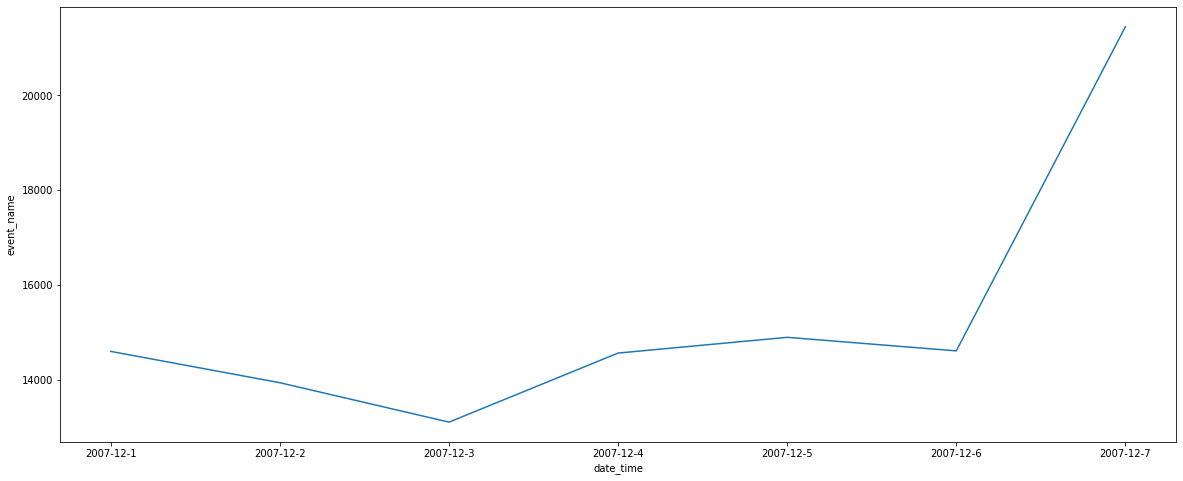

In [11]:
num_of_installs = df_installs.groupby("date_time").count()["event_name"].reset_index()

fig = plt.figure(figsize=(20, 8))
sns.lineplot(x=num_of_installs.date_time, y=num_of_installs.event_name)

In [12]:
install_growth = num_of_installs.iloc[-1, 1] - num_of_installs.iloc[0, 1]
install_growth_per = 100 * (num_of_installs.iloc[-1, 1] - num_of_installs.iloc[0, 1]) / num_of_installs.iloc[0, 1]

install_growth_6_and_7_per = 100 * (num_of_installs.iloc[-1, 1] - num_of_installs.iloc[-2, 1]) / install_growth

print(f"Install growth: {install_growth_per:.2f}%")
print(f"Proportion of total install growth (6th and 7th December): {install_growth_6_and_7_per:.2f}%")

Install growth: 46.90%
Proportion of total install growth (6th and 7th December): 99.84%


##### During the week, the number of downloads increased significantly, the increase was about 47%, however, the main increase fell to numbers between 6 and 7 (more than 99.8 percent of downloads)

In [13]:
df_app_events.rename(modify_columns(df_app_events), axis=1, inplace=True)
df_app_events

,unnamed:_0,unnamed:_0.1,date_time,event_name,region,language,platform,device_type,os_version,is_retargeting
0,0,0,2007-12-4,trial_converted,NaN,NaN,ios,NaN,15.6.1,False
1,1,2,2007-12-1,trial_started,NaN,NaN,ios,NaN,15.6.1,False
2,2,5,2007-12-1,trial_started,NaN,NaN,ios,NaN,15.6.1,False
3,3,7,2007-12-1,trial_started,SA,NaN,ios,NaN,15.6.1,False
4,4,8,2007-12-1,trial_started,NaN,NaN,ios,NaN,15.6.1,False
...,...,...,...,...,...,...,...,...,...,...
10609,10609,31438,2007-12-3,trial_converted,SA,NaN,ios,NaN,15.6,False
10610,10610,31458,2007-12-5,trial_started,EU,NaN,ios,NaN,16.0.3,False
10611,10611,31537,2007-12-1,trial_converted,NaN,NaN,ios,NaN,15.6.1,False
10612,10612,31545,2007-12-2,trial_converted,NaN,NaN,ios,NaN,15.6.1,False


<AxesSubplot:xlabel='date_time', ylabel='Converted Event'>

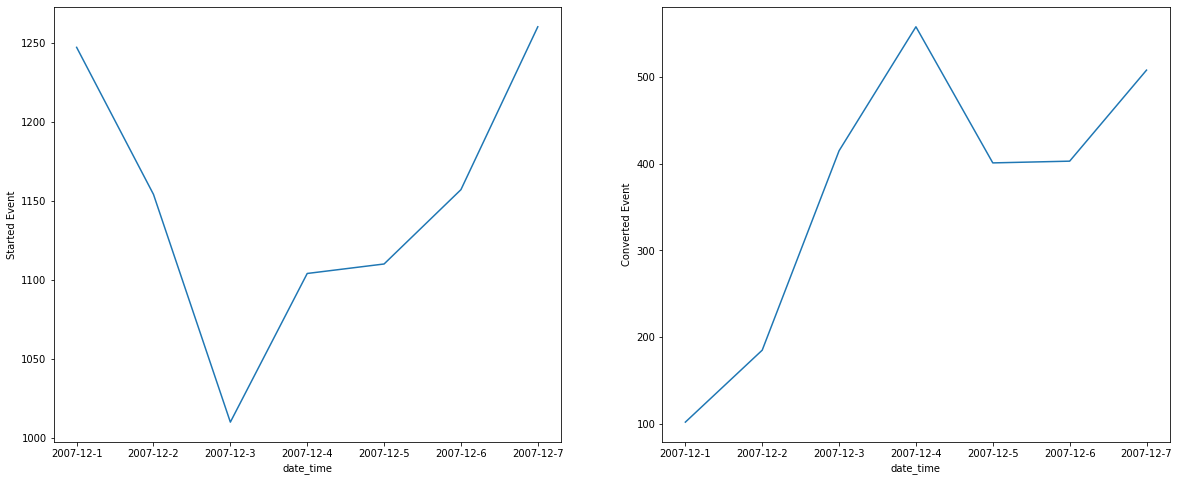

In [14]:
def count_events(df:pd.DataFrame, by:str, event_name:str) -> pd.DataFrame:
    return df.loc[df.event_name == event_name, :].groupby(by).count()["event_name"].reset_index()

num_of_trial_started_events = count_events(df_app_events, by="date_time", event_name="trial_started")
num_of_trial_converted_events = count_events(df_app_events, by="date_time", event_name="trial_converted")

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].set_ylabel("Started Event")
sns.lineplot(x=num_of_trial_started_events.date_time, y=num_of_trial_started_events.event_name, ax=ax[0])
ax[1].set_ylabel("Converted Event")
sns.lineplot(x=num_of_trial_converted_events.date_time, y=num_of_trial_converted_events.event_name, ax=ax[1])

##### The observed week can be indicative for a further analysis of advertising campaigns, since the number of users subscribed to the trial has grown significantly AND decreased within one week. Particularly interested in a significant decline in subscriptions at the time of December 3rd.

In [15]:
df_proceeds.rename(modify_columns(df_proceeds), axis=1, inplace=True)
df_proceeds

,unnamed:_0,unnamed:_0.1,provider,provider_country,developer_proceeds,begin_date,end_date,customer_currency,country_code,currency_of_proceeds,customer_price,device,supported_platforms
0,0,0,APPLE,US,20.58,12/1/2007,12/1/2007,RON,RO,RON,34.99,iPhone,iOS
1,1,1,APPLE,US,0.00,12/1/2007,12/1/2007,USD,ZW,USD,0.00,iPhone,iOS
2,2,2,APPLE,US,4.66,12/1/2007,12/1/2007,USD,OM,USD,6.99,iPhone,iOS
3,3,3,APPLE,US,0.00,12/1/2007,12/1/2007,USD,GM,USD,0.00,iPhone,iOS
4,5,5,APPLE,US,4.08,12/1/2007,12/1/2007,USD,UA,USD,6.99,iPhone,iOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7271,8663,8663,APPLE,US,6.99,12/7/2007,12/7/2007,NZD,NZ,NZD,11.49,iPhone,iOS
7272,8664,8664,APPLE,US,76.99,12/7/2007,12/7/2007,EGP,EG,EGP,109.99,iPhone,iOS
7273,8665,8665,APPLE,US,42.80,12/7/2007,12/7/2007,TRY,TR,TRY,77.99,iPhone,iOS
7274,8666,8666,APPLE,US,3.98,12/7/2007,12/7/2007,EUR,IT,EUR,6.99,iPhone,iOS


##### It is worth taking into account the currency of the proceeds and reducing the amounts to the amount in USD

In [16]:
df_proceeds_copy = df_proceeds.copy()

with open("./src/currency_dict.json") as f:
    df_proceeds_copy["currency_multy"] = df_proceeds["currency_of_proceeds"].map(json.load(f)).astype("float64")
    df_proceeds_copy["developer_proceeds_usd"] = (df_proceeds_copy["developer_proceeds"] * df_proceeds_copy["currency_multy"] * 100).astype(int) / 100

df_proceeds_copy

,unnamed:_0,unnamed:_0.1,provider,provider_country,developer_proceeds,begin_date,end_date,customer_currency,country_code,currency_of_proceeds,customer_price,device,supported_platforms,currency_multy,developer_proceeds_usd
0,0,0,APPLE,US,20.58,12/1/2007,12/1/2007,RON,RO,RON,34.99,iPhone,iOS,0.218079,4.48
1,1,1,APPLE,US,0.00,12/1/2007,12/1/2007,USD,ZW,USD,0.00,iPhone,iOS,1.000000,0.00
2,2,2,APPLE,US,4.66,12/1/2007,12/1/2007,USD,OM,USD,6.99,iPhone,iOS,1.000000,4.66
3,3,3,APPLE,US,0.00,12/1/2007,12/1/2007,USD,GM,USD,0.00,iPhone,iOS,1.000000,0.00
4,5,5,APPLE,US,4.08,12/1/2007,12/1/2007,USD,UA,USD,6.99,iPhone,iOS,1.000000,4.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7271,8663,8663,APPLE,US,6.99,12/7/2007,12/7/2007,NZD,NZ,NZD,11.49,iPhone,iOS,0.638133,4.46
7272,8664,8664,APPLE,US,76.99,12/7/2007,12/7/2007,EGP,EG,EGP,109.99,iPhone,iOS,0.033846,2.60
7273,8665,8665,APPLE,US,42.80,12/7/2007,12/7/2007,TRY,TR,TRY,77.99,iPhone,iOS,0.053222,2.27
7274,8666,8666,APPLE,US,3.98,12/7/2007,12/7/2007,EUR,IT,EUR,6.99,iPhone,iOS,1.082063,4.30


In [17]:
len(df_proceeds.loc[df_proceeds.begin_date != df_proceeds.end_date, :])

0

,end_date,developer_proceeds_usd
0,12/1/2007,2834.31
1,12/2/2007,2968.91
2,12/3/2007,2945.85
3,12/4/2007,3238.37
4,12/5/2007,3049.78
5,12/6/2007,2842.26
6,12/7/2007,2567.04


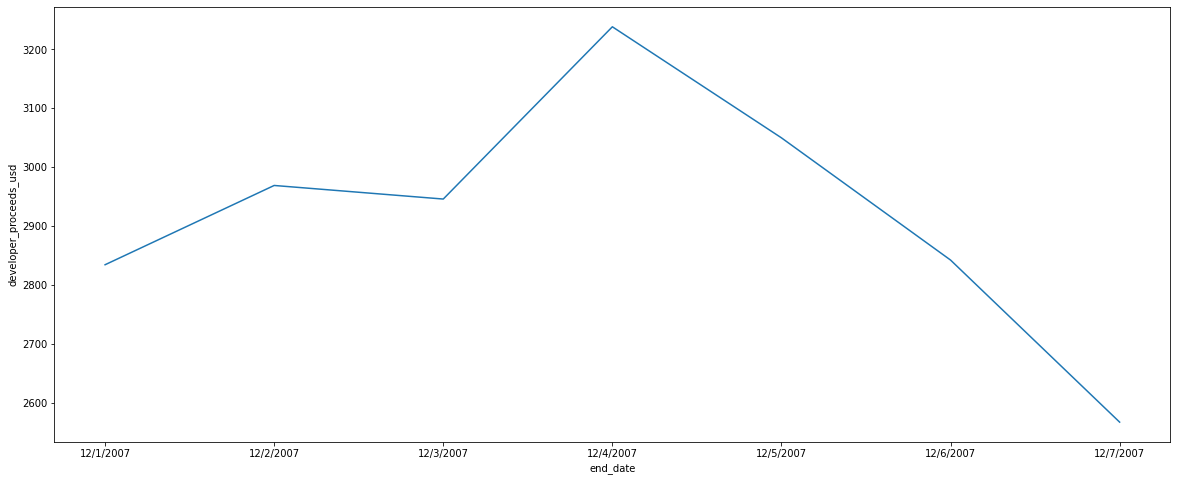

In [18]:
sum_of_proceeds = df_proceeds_copy.groupby("end_date").sum()["developer_proceeds_usd"].reset_index()

fig = plt.figure(figsize=(20, 8))
sns.lineplot(x=sum_of_proceeds.end_date, y=sum_of_proceeds.developer_proceeds_usd)
sum_of_proceeds

##### By the 4th, proceeds reached their max and then started to decline until the 7th.

,country_name,developer_proceeds_usd
0,United States,2462.92
1,Mexico,759.18
2,Canada,753.84
3,France,676.98
4,United Kingdom,669.40
5,Italy,658.06


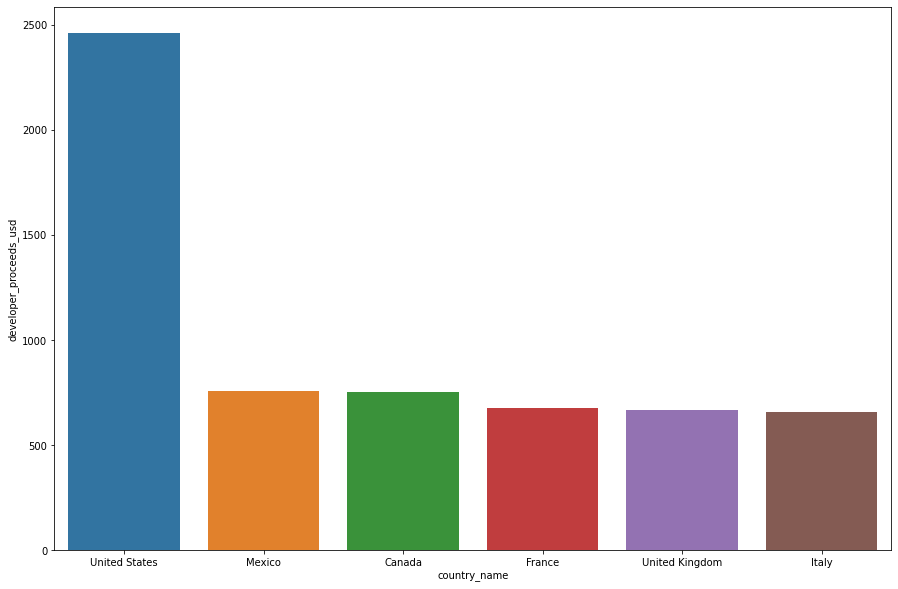

In [54]:
df_proceeds_сountry = df_proceeds_copy.groupby("country_code").sum()["developer_proceeds_usd"].reset_index()

with open("./src/country_codes.json") as f:
    df_proceeds_сountry["country_name"] = df_proceeds_сountry["country_code"].map(json.load(f))

top_5_country_proceeds = df_proceeds_сountry.sort_values("developer_proceeds_usd", ascending=False).reset_index(drop=True)\
                                                                    .loc[:5, ["country_name", "developer_proceeds_usd"]]

plt.figure(figsize=(15, 10))
sns.barplot(x=top_5_country_proceeds.country_name, y=top_5_country_proceeds.developer_proceeds_usd)
top_5_country_proceeds

##### The main amount of proceeds comes from the USA, the rest in the top 5 is evenly distributed

In [33]:
df_cost.rename(modify_columns(df_cost), axis=1, inplace=True)
df_cost.currency.unique()

array(['USD'], dtype=object)

In [55]:
df_cost

,unnamed:_0,media_source,date,geo,cost,currency
0,0,source_1,2007-12-04,TZ,0.000000,USD
1,1,source_2,2007-12-05,LB,3.134363,USD
2,2,source_3,2007-12-07,MP,0.400430,USD
3,3,source_1,2007-12-02,WF,0.000000,USD
4,4,source_2,2007-12-04,VE,1.716088,USD
...,...,...,...,...,...,...
3461,3461,source_1,2007-12-07,IO,0.000000,USD
3462,3462,source_7,2007-12-02,AW,0.000000,USD
3463,3463,source_3,2007-12-01,BE,5.418999,USD
3464,3464,source_3,2007-12-05,BA,4.094334,USD


<AxesSubplot:xlabel='date', ylabel='cost'>

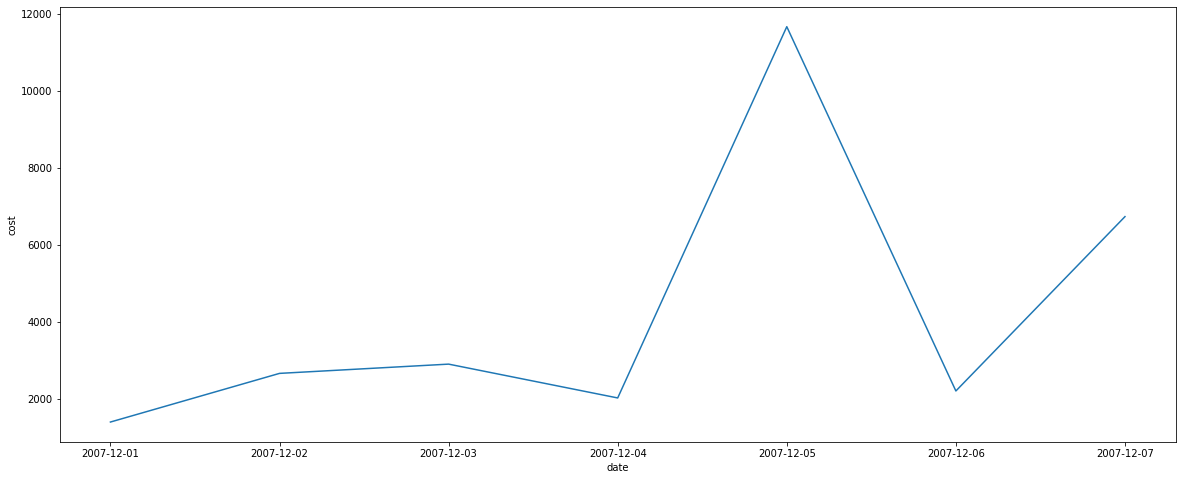

In [20]:
sum_of_costs = df_cost.groupby("date").sum()["cost"].reset_index()

fig = plt.figure(figsize=(20, 8))
sns.lineplot(x=sum_of_costs.date, y=sum_of_costs.cost)

In [21]:
def format_dates(df:pd.DataFrame, date_col:str) -> pd.DataFrame:
    df.rename({date_col: "date"}, axis=1, inplace=True)
    df["date"] = pd.to_datetime(df["date"])

    return df

num_of_installs = format_dates(num_of_installs, "date_time")
num_of_trial_started_events = format_dates(num_of_trial_started_events, "date_time")
num_of_trial_converted_events = format_dates(num_of_trial_converted_events, "date_time")
sum_of_proceeds = format_dates(sum_of_proceeds, "end_date")
sum_of_costs = format_dates(sum_of_costs, "date")

In [22]:
from functools import reduce

dataframes_list = [num_of_installs, num_of_trial_started_events, num_of_trial_converted_events, sum_of_proceeds, sum_of_costs]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date'],
                                            how='outer'), dataframes_list)
df_merged.columns = ["date", "installs", "trial_started", "trial_converted", "proceeds", "cost"]

In [23]:
row_num = df_merged.shape[0]
df_merged["refunds"] = np.asarray([4.1]*row_num)
df_merged["rebills"] = np.asarray([8.44]*row_num)
df_merged["first_payments"] = df_merged.trial_converted * (1 - df_merged.refunds)
df_merged["eproceeds_1w"] = df_merged.first_payments * df_merged.proceeds
df_merged["eproceeds"] = df_merged.eproceeds_1w * df_merged.rebills
df_merged["ltv_install"] = df_merged.eproceeds / df_merged.installs
df_merged["ltv_trial"] = df_merged.eproceeds / df_merged.trial_started
df_merged["ltv_paying_user"] = df_merged.eproceeds / df_merged.trial_converted

In [24]:
df_merged_daily = df_merged.copy()

In [25]:
df_merged_daily

,date,installs,trial_started,trial_converted,proceeds,cost,refunds,rebills,first_payments,eproceeds_1w,eproceeds,ltv_install,ltv_trial,ltv_paying_user
0,2007-12-01,14601,1247,102,2834.31,1399.843056,4.1,8.44,-316.2,-896208.822,-7.564002e+06,-518.046877,-6065.759790,-74156.88684
1,2007-12-02,13940,1154,185,2968.91,2664.345674,4.1,8.44,-573.5,-1702669.885,-1.437053e+07,-1030.884780,-12452.802279,-77678.56124
2,2007-12-03,13109,1010,415,2945.85,2904.949695,4.1,8.44,-1286.5,-3789836.025,-3.198622e+07,-2440.019532,-31669.520843,-77075.21940
3,2007-12-04,14566,1104,558,3238.37,2025.746112,4.1,8.44,-1729.8,-5601732.426,-4.727862e+07,-3245.820519,-42824.838474,-84728.71268
4,2007-12-05,14898,1110,401,3049.78,11675.703315,4.1,8.44,-1243.1,-3791181.518,-3.199757e+07,-2147.776347,-28826.641452,-79794.44392
5,2007-12-06,14612,1157,403,2842.26,2207.365210,4.1,8.44,-1249.3,-3550835.418,-2.996905e+07,-2050.988977,-25902.377639,-74364.89064
6,2007-12-07,21449,1260,508,2567.04,6738.748568,4.1,8.44,-1574.8,-4042574.592,-3.411933e+07,-1590.718894,-27078.832981,-67164.03456


In [26]:
df_merged_week = df_merged_daily.sum(numeric_only=True).to_frame().T
df_merged_week["refunds"] = 4.1
df_merged_week["rebills"] = 8.44

In [27]:
df_merged_week_copy = df_merged_week.copy()

In [28]:
df_merged_week

,installs,trial_started,trial_converted,proceeds,cost,refunds,rebills,first_payments,eproceeds_1w,eproceeds,ltv_install,ltv_trial,ltv_paying_user
0,107175.0,8042.0,2572.0,20446.52,29616.701632,4.1,8.44,-7973.2,-2.337504e+07,-1.972853e+08,-13024.255926,-174820.773457,-534962.74928


In [29]:
df_merged_daily.loc[:, "first_payments":] = df_merged.loc[:, "first_payments":].applymap(lambda x: abs(int(x)))
df_merged_week_copy.loc[:, "first_payments":] = df_merged_week.loc[:, "first_payments":].applymap(lambda x: abs(int(x)))

In [30]:
df_merged_daily

,date,installs,trial_started,trial_converted,proceeds,cost,refunds,rebills,first_payments,eproceeds_1w,eproceeds,ltv_install,ltv_trial,ltv_paying_user
0,2007-12-01,14601,1247,102,2834.31,1399.843056,4.1,8.44,316,896208,7564002,518,6065,74156
1,2007-12-02,13940,1154,185,2968.91,2664.345674,4.1,8.44,573,1702669,14370533,1030,12452,77678
2,2007-12-03,13109,1010,415,2945.85,2904.949695,4.1,8.44,1286,3789836,31986216,2440,31669,77075
3,2007-12-04,14566,1104,558,3238.37,2025.746112,4.1,8.44,1729,5601732,47278621,3245,42824,84728
4,2007-12-05,14898,1110,401,3049.78,11675.703315,4.1,8.44,1243,3791181,31997572,2147,28826,79794
5,2007-12-06,14612,1157,403,2842.26,2207.365210,4.1,8.44,1249,3550835,29969050,2050,25902,74364
6,2007-12-07,21449,1260,508,2567.04,6738.748568,4.1,8.44,1574,4042574,34119329,1590,27078,67164


In [31]:
df_merged_week_copy

,installs,trial_started,trial_converted,proceeds,cost,refunds,rebills,first_payments,eproceeds_1w,eproceeds,ltv_install,ltv_trial,ltv_paying_user
0,107175.0,8042.0,2572.0,20446.52,29616.701632,4.1,8.44,7973.0,23375038.0,197285326.0,13024.0,174820.0,534962.0
